In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import KNNImputer


In [2]:

df = pd.read_csv('../Data/data69rhone.csv')

print(df.shape)
df.head()
df_temp =  df.copy()


C:\Users\ediad\AppData\Local\Temp\ipykernel_20872\2504501126.py:1: DtypeWarning: Columns (3,27,39,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/data69rhone.csv')


(287165, 127)


In [3]:
# Before dropping NaN values
print("Before dropping NaN values:")
print(df.shape)

# Drop rows where 'Coût_total_5_usages' is NaN
df.dropna(subset=["Coût_total_5_usages"], inplace=True)

# After dropping NaN values
print("\nAfter dropping NaN values:")
print(df.shape)

Before dropping NaN values:
(287165, 127)



After dropping NaN values:
(287154, 127)


In [4]:
df[['Vérification_coût_total','Somme_coûts','Coût_total_5_usages']].isnull().mean()

Vérification_coût_total    0.0
Somme_coûts                0.0
Coût_total_5_usages        0.0
dtype: float64

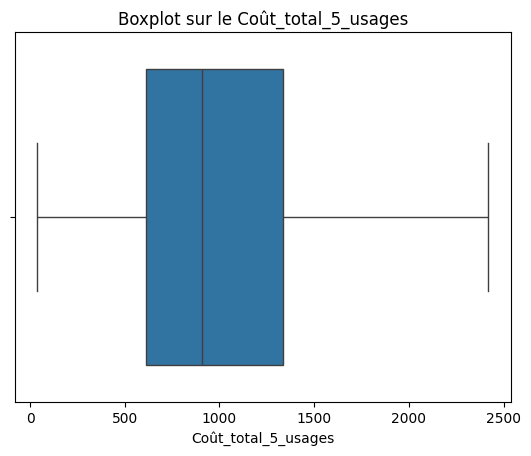

In [5]:
target = "Coût_total_5_usages"

# Créer un boxplot pour une colonne spécifique
sns.boxplot(data=df, x = target, showfliers=False)

# Afficher le graphique
plt.title(f'Boxplot sur le {target}')
plt.show()

Analyse les déciles de la variable cible (Coût_total_5_usages)

In [6]:

# Créer une séquence de 0 à 1 avec un pas de 0.1
sequence = np.arange(0, 1.1, 0.1)

# Calculer les déciles (0.1, 0.2, ..., 0.9) en ajoutant les percentiles à describe()
resultat = df[target].describe(percentiles=sequence)
print(resultat)

count    2.871540e+05
mean     1.533468e+03
std      3.566948e+04
min      3.830000e+01
0%       3.830000e+01
10%      4.240000e+02
20%      5.500000e+02
30%      6.677000e+02
40%      7.838000e+02
50%      9.063000e+02
60%      1.049300e+03
70%      1.224000e+03
80%      1.467000e+03
90%      1.927700e+03
100%     1.892502e+07
max      1.892502e+07
Name: Coût_total_5_usages, dtype: float64


In [7]:
# Calcul des quartiles
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1

# Détermination des limites
limite_inferieure = Q1 - 1.5 * IQR
limite_superieure = Q3 + 1.5 * IQR

# Retrait des valeurs aberrantes
df= df[(df[target] >= limite_inferieure) & (df[target] <= limite_superieure)]

In [8]:
df.shape

(270348, 127)

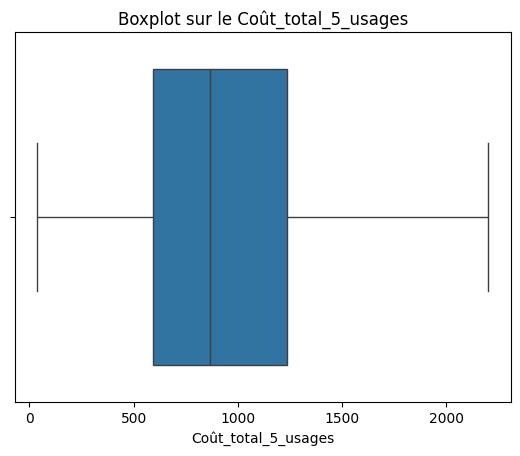

In [9]:
target = "Coût_total_5_usages"

# Créer un boxplot pour une colonne spécifique
sns.boxplot(data=df, x = target, showfliers=False)

# Afficher le graphique
plt.title(f'Boxplot sur le {target}')
plt.show()

In [54]:
for  i in  df_temp.columns: 
    print(i)

Conso_chauffage_dépensier_é_finale
Nom__commune_(BAN)
Emission_GES_chauffage
Besoin_refroidissement
Coût_total_5_usages
Coordonnée_cartographique_X_(BAN)
Nombre_niveau_logement
Type_installation_ECS_(général)
Déperditions_murs
Conso_5_usages_par_m²_é_primaire
Coût_refroidissement
Ubat_W/m²_K
Coût_ECS_dépensier
Emission_GES_auxiliaires
Année_construction
Emission_GES_5_usages_par_m²
Emission_GES_éclairage
Conso_ECS_dépensier_é_finale
Adresse_(BAN)
Date_visite_diagnostiqueur
Coût_ECS
Nombre_niveau_immeuble
Surface_habitable_immeuble
Complément_d'adresse_logement
Coût_éclairage
Date_établissement_DPE
N°_voie_(BAN)
Besoin_ECS
N°DPE
Conso_refroidissement_é_finale
Logement_traversant_(0/1)
Conso_chauffage_é_primaire
Appartement_non_visité_(0/1)
Adresse_brute
Conso_éclairage_é_primaire
Qualité_isolation_menuiseries
Qualité_isolation_murs
Emission_GES_5_usages_énergie_n°1
Statut_géocodage
Classe_inertie_bâtiment
Nombre_appartement
Modèle_DPE
Conso_5_usages_é_finale
N°_département_(BAN)
Conso_r

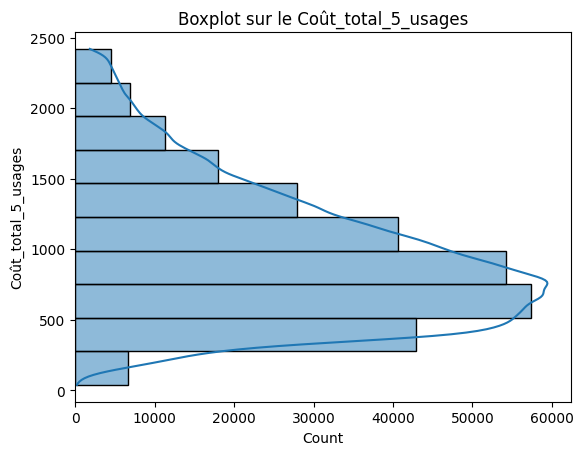

In [10]:
# distribution  

# Créer un boxplot pour une colonne spécifique
sns.histplot(data=df, y = target,  bins=10,  kde=True)

# Afficher le graphique
plt.title(f'Boxplot sur le {target}')
plt.show()

In [11]:

# Créer une séquence de 0 à 1 avec un pas de 0.1
sequence = np.arange(0, 1.1, 0.1)

# Calculer les déciles (0.1, 0.2, ..., 0.9) en ajoutant les percentiles à describe()
resultat = df[target].describe(percentiles=sequence)
print(resultat)

count    270348.000000
mean        955.238761
std         472.384139
min          38.300000
0%           38.300000
10%         416.100000
20%         535.200000
30%         649.900000
40%         757.400000
50%         868.900000
60%         996.200000
70%        1147.000000
80%        1341.400000
90%        1638.500000
100%       2419.800000
max        2419.800000
Name: Coût_total_5_usages, dtype: float64


Variables explicatives

In [12]:
# Vérification des données manquantes
ls_variables_explicatives = [
'Statut_géocodage',
'Année_construction',
'Annee_reception_DPE',
'Nombre_niveau_logement',
'Nombre_niveau_immeuble',
'Periode_construction',
'Surface_habitable_logement',
'Type_énergie_n°1',
'Type_énergie_n°2',
'Etiquette_DPE',
'Etiquette_GES',
'Catégorie_ENR',
'N°_étage_appartement',
'Hauteur_sous-plafond',
'Logement_traversant_(0/1)',
'Présence_brasseur_air_(0/1)',
'Classe_inertie_bâtiment',
'Classe_altitude',
'Indicateur_confort_été',
'Isolation_toiture_(0/1)',
'Protection_solaire_exterieure_(0/1)',
'Inertie_lourde_(0/1)',
'Deperditions_baies_vitrées',
'Deperditions_enveloppe',
'Déperditions_murs',
'Deperditions_planchers_bas',
'Deperditions_planchers_hauts',
'Déperditions_ponts_thermiques',
'Déperditions_portes',
'Déperditions_renouvellement_air',
'Qualité_isolation_enveloppe',
'Qualité_isolation_menuiseries',
'Qualité_isolation_murs',
'Qualité_isolation_plancher_bas']

In [13]:

#get  continus  column
# colQuanti  = df[ls_variables_explicatives].select_dtypes(include='number').columns
# colQali   = df[ls_variables_explicatives].select_dtypes(include='object').columns



In [14]:
# Créer une séquence de 0 à 1 avec un pas de 0.1
sequence = np.arange(0, 1.1, 0.1)

# Calculer les déciles (0.1, 0.2, ..., 0.9) en ajoutant les percentiles à describe()
resultat = df.describe(percentiles=sequence)
print(resultat)

       Conso_chauffage_dépensier_é_finale  Emission_GES_chauffage  \
count                       270348.000000           270348.000000   
mean                          7344.409953             1033.183033   
std                           6185.389234             1142.702293   
min                              0.000000                0.000000   
0%                               0.000000                0.000000   
10%                           1499.270000               80.800000   
20%                           2350.400000              174.400000   
30%                           3221.200000              286.110000   
40%                           4244.880000              422.980000   
50%                           5450.400000              593.900000   
60%                           6893.240000              827.620000   
70%                           8932.990000             1208.900000   
80%                          11796.420000             1774.200000   
90%                          16022

In [15]:
# Vérification des données manquantes
df[ls_variables_explicatives].isnull().mean().sort_values(ascending=False)

Catégorie_ENR                          0.776810
Nombre_niveau_immeuble                 0.578906
Inertie_lourde_(0/1)                   0.479778
Isolation_toiture_(0/1)                0.471104
Protection_solaire_exterieure_(0/1)    0.467838
Indicateur_confort_été                 0.467838
Logement_traversant_(0/1)              0.467838
Présence_brasseur_air_(0/1)            0.467838
Periode_construction                   0.422618
Année_construction                     0.351466
Type_énergie_n°2                       0.318397
N°_étage_appartement                   0.187954
Classe_inertie_bâtiment                0.127521
Deperditions_planchers_bas             0.123186
Deperditions_planchers_hauts           0.123078
Déperditions_portes                    0.122124
Déperditions_ponts_thermiques          0.121728
Deperditions_baies_vitrées             0.121554
Déperditions_murs                      0.121547
Deperditions_enveloppe                 0.121543
Déperditions_renouvellement_air        0

In [16]:
# Sélectionner uniquement les colonnes quantitatives (numériques)
quant_cols = df[ls_variables_explicatives].select_dtypes(include=[np.number]).columns

# Afficher les colonnes quantitatives
print("Colonnes quantitatives :", quant_cols)

# Imputation avec le mode
for col in quant_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Utiliser la première valeur du mode

# Vérification des données manquantes
missing_values_after_mode_imputation = df[quant_cols].isnull().sum()
print("Valeurs manquantes après imputation avec le mode :", missing_values_after_mode_imputation)


Colonnes quantitatives : Index(['Année_construction', 'Annee_reception_DPE', 'Nombre_niveau_logement',
       'Nombre_niveau_immeuble', 'Surface_habitable_logement',
       'N°_étage_appartement', 'Hauteur_sous-plafond',
       'Deperditions_baies_vitrées', 'Deperditions_enveloppe',
       'Déperditions_murs', 'Deperditions_planchers_bas',
       'Deperditions_planchers_hauts', 'Déperditions_ponts_thermiques',
       'Déperditions_portes', 'Déperditions_renouvellement_air'],
      dtype='object')
Valeurs manquantes après imputation avec le mode : Année_construction                 0
Annee_reception_DPE                0
Nombre_niveau_logement             0
Nombre_niveau_immeuble             0
Surface_habitable_logement         0
N°_étage_appartement               0
Hauteur_sous-plafond               0
Deperditions_baies_vitrées         0
Deperditions_enveloppe             0
Déperditions_murs                  0
Deperditions_planchers_bas         0
Deperditions_planchers_hauts       0
Dép

C:\Users\ediad\AppData\Local\Temp\ipykernel_20872\1249561350.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Utiliser la première valeur du mode
C:\Users\ediad\AppData\Local\Temp\ipykernel_20872\1249561350.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [17]:
# Sélectionner toutes les colonnes non numériques (qualitatives)
categorical_cols = df[ls_variables_explicatives].select_dtypes(exclude=[np.number]).columns

# Appliquer l'imputation par la valeur la plus fréquente (mode) pour chaque colonne catégorielle
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Vérification des données manquantes
df[categorical_cols].isnull().sum()

C:\Users\ediad\AppData\Local\Temp\ipykernel_20872\3031881694.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


Statut_géocodage                       0
Periode_construction                   0
Type_énergie_n°1                       0
Type_énergie_n°2                       0
Etiquette_DPE                          0
Etiquette_GES                          0
Catégorie_ENR                          0
Logement_traversant_(0/1)              0
Présence_brasseur_air_(0/1)            0
Classe_inertie_bâtiment                0
Classe_altitude                        0
Indicateur_confort_été                 0
Isolation_toiture_(0/1)                0
Protection_solaire_exterieure_(0/1)    0
Inertie_lourde_(0/1)                   0
Qualité_isolation_enveloppe            0
Qualité_isolation_menuiseries          0
Qualité_isolation_murs                 0
Qualité_isolation_plancher_bas         0
dtype: int64

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder  =  OrdinalEncoder()
# encoding categorical data

df[categorical_cols] = ordinalEncoder.fit_transform(df[categorical_cols])



In [19]:
df[categorical_cols].dtypes

Statut_géocodage                       float64
Periode_construction                   float64
Type_énergie_n°1                       float64
Type_énergie_n°2                       float64
Etiquette_DPE                          float64
Etiquette_GES                          float64
Catégorie_ENR                          float64
Logement_traversant_(0/1)              float64
Présence_brasseur_air_(0/1)            float64
Classe_inertie_bâtiment                float64
Classe_altitude                        float64
Indicateur_confort_été                 float64
Isolation_toiture_(0/1)                float64
Protection_solaire_exterieure_(0/1)    float64
Inertie_lourde_(0/1)                   float64
Qualité_isolation_enveloppe            float64
Qualité_isolation_menuiseries          float64
Qualité_isolation_murs                 float64
Qualité_isolation_plancher_bas         float64
dtype: object

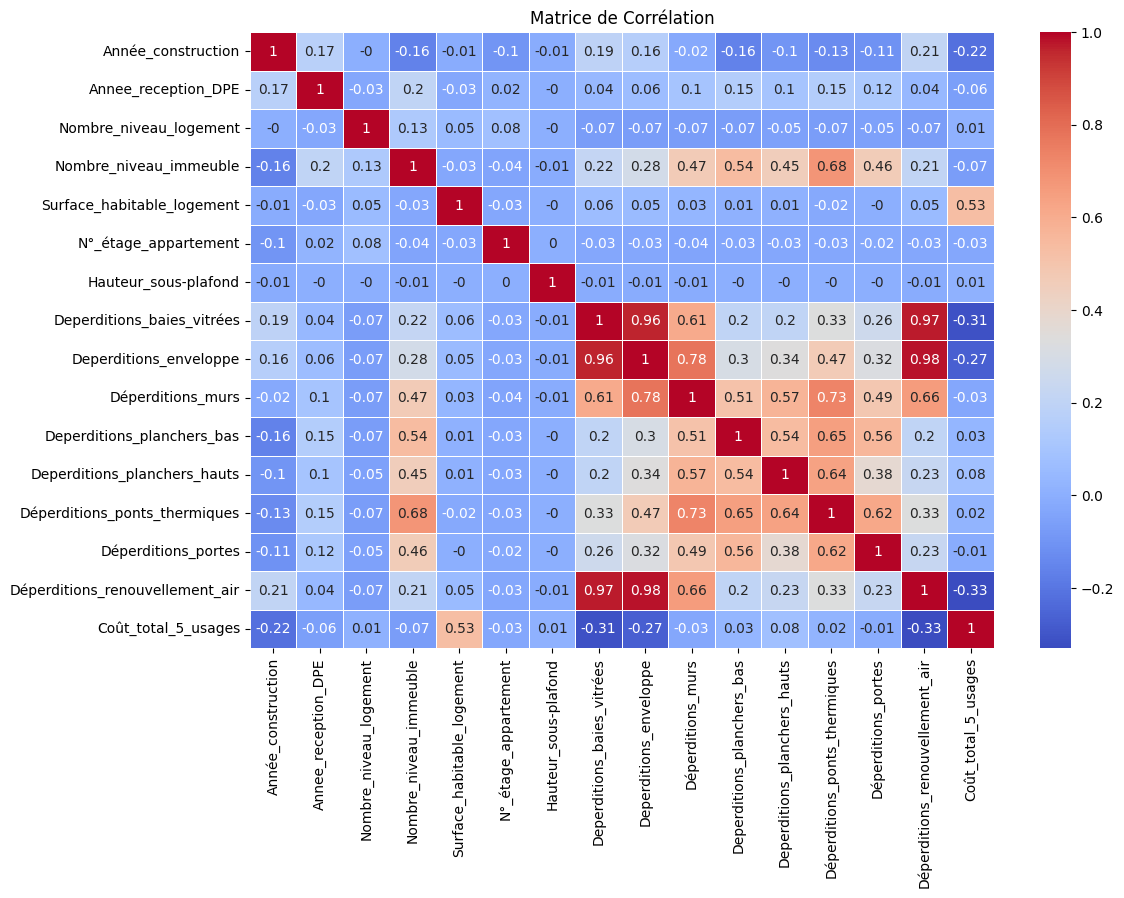

In [20]:
# Calcul de la matrice de corrélation
corr_matrix = round(df[list(quant_cols) + [target] ].corr(),2)
# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [21]:
# Concaténer les deux listes : ls_variables_explicatives et target
df = df[list(ls_variables_explicatives) + [target]]
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [22]:
# Utiliser set.difference() pour exclure la colonne cible de ls_variables_explicatives
X =df[df.columns.difference([target])]

In [23]:
Y = df[target]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [25]:
print(X_train.shape)
print(X_test.shape)
X_test.head()

(189243, 34)
(81105, 34)


,Annee_reception_DPE,Année_construction,Catégorie_ENR,Classe_altitude,Classe_inertie_bâtiment,Deperditions_baies_vitrées,Deperditions_enveloppe,Deperditions_planchers_bas,Deperditions_planchers_hauts,Déperditions_murs,...,Protection_solaire_exterieure_(0/1),Présence_brasseur_air_(0/1),Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Statut_géocodage,Surface_habitable_logement,Type_énergie_n°1,Type_énergie_n°2
116584,2023,1990.0,8.0,1.0,2.0,16.2,60.7,0.0,0.0,6.1,...,1.0,0.0,1.0,0.0,2.0,3.0,0.0,51.0,7.0,11.0
119020,2021,1974.0,8.0,1.0,1.0,70.6,187.9,0.0,0.0,39.4,...,1.0,0.0,0.0,2.0,1.0,3.0,1.0,75.1,10.0,11.0
57802,2024,2024.0,8.0,1.0,2.0,45.7,227.9,0.0,0.0,81.3,...,1.0,0.0,1.0,1.0,1.0,3.0,0.0,75.0,7.0,11.0
181955,2023,2024.0,8.0,1.0,1.0,43.2,278.9,22.3,12.8,59.0,...,0.0,0.0,0.0,2.0,0.0,2.0,1.0,119.0,10.0,11.0
50633,2023,1974.0,8.0,1.0,2.0,6218.4,23145.9,741.4,436.8,3314.4,...,1.0,0.0,1.0,2.0,2.0,1.0,1.0,70.0,7.0,11.0


In [26]:
# df['Coût_total_5_usages'].isnull().sum()
df.isnull().sum()

Statut_géocodage                       0
Année_construction                     0
Annee_reception_DPE                    0
Nombre_niveau_logement                 0
Nombre_niveau_immeuble                 0
Periode_construction                   0
Surface_habitable_logement             0
Type_énergie_n°1                       0
Type_énergie_n°2                       0
Etiquette_DPE                          0
Etiquette_GES                          0
Catégorie_ENR                          0
N°_étage_appartement                   0
Hauteur_sous-plafond                   0
Logement_traversant_(0/1)              0
Présence_brasseur_air_(0/1)            0
Classe_inertie_bâtiment                0
Classe_altitude                        0
Indicateur_confort_été                 0
Isolation_toiture_(0/1)                0
Protection_solaire_exterieure_(0/1)    0
Inertie_lourde_(0/1)                   0
Deperditions_baies_vitrées             0
Deperditions_enveloppe                 0
Déperditions_mur

In [27]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train,y_train)

In [28]:
coef = pd.DataFrame(lr_model.coef_ ,index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = lr_model.intercept_
coef

,Coef
Annee_reception_DPE,29.788818
Année_construction,-0.250201
Catégorie_ENR,9.578550
Classe_altitude,-92.040720
Classe_inertie_bâtiment,-3.456697
Deperditions_baies_vitrées,0.025674
Deperditions_enveloppe,0.006861
Deperditions_planchers_bas,-0.017227
Deperditions_planchers_hauts,0.021795
Déperditions_murs,0.027757


In [29]:
y_pred = lr_model.predict(X_test)
y_pred

array([ 622.39437632, 1130.64834828, 1505.26921012, ..., 1231.21599012,
        213.03208179,  563.17731276])

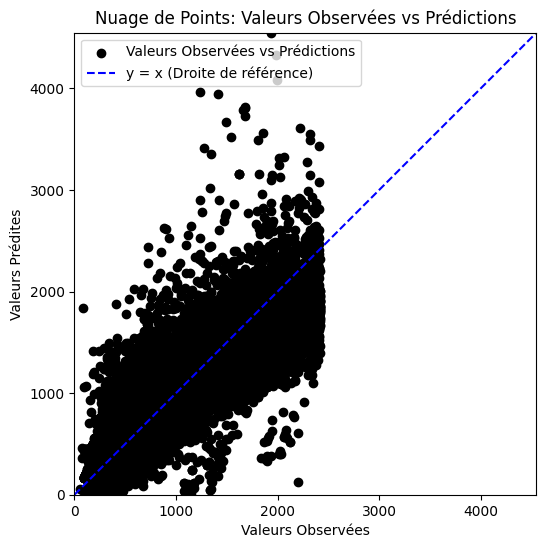

In [30]:
# Taille de la figure
plt.figure(figsize=(10, 6))

# Nuage de points pour les valeurs observées et prédites
plt.scatter(y_test, y_pred, color='black', label='Valeurs Observées vs Prédictions')

# Tracer la droite d'équation y = x
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='blue', linestyle='--', label='y = x (Droite de référence)')

# Définir les limites des axes
plt.xlim(0, max_val)
plt.ylim(0, max_val)

# Assurer que les axes ont la même échelle
plt.gca().set_aspect('equal', adjustable='box')

# Ajouter des labels et une légende
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('Nuage de Points: Valeurs Observées vs Prédictions')
plt.legend()

# Afficher le graphique
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("MAE : " + str(mean_absolute_error(y_test, y_pred)))
print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test, y_pred)))

MAE : 159.16537949100604
RMSE : 218.0557770316835
R² : 0.7861797976715609


c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Ajuster (fit) le scaler uniquement sur les données d'entraînement et appliquer la transformation (fit_transform)
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la transformation sur les données de test (transform uniquement, sans fit)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Initialiser le StandardScaler pour les cibles (y)
scaler_y = StandardScaler()

# Convertir y_train et y_test en tableau NumPy pour appliquer reshape
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))

In [34]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train_scaled,y_train_scaled)

In [35]:
# Aplatir le coefficient du modèle pour correspondre à l'index des colonnes de X_train
coef_scaled = pd.DataFrame(lr_model.coef_.flatten(), index=X_train.columns, columns=['Coef'])

# Ajouter l'intercept (biais) au DataFrame
coef_scaled.loc['Constante'] = lr_model.intercept_[0]  # Si intercept_ est un tableau

# Modifier l'affichage global des nombres en pandas pour utiliser un format décimal avec 6 chiffres après la virgule
pd.options.display.float_format = '{:.6f}'.format

# Affichage des coefficients avec les nouvelles options
coef_scaled

,Coef
Annee_reception_DPE,0.048922
Année_construction,-0.017282
Catégorie_ENR,0.032405
Classe_altitude,-0.025645
Classe_inertie_bâtiment,-0.007352
Deperditions_baies_vitrées,0.120612
Deperditions_enveloppe,0.140243
Deperditions_planchers_bas,-0.004919
Deperditions_planchers_hauts,0.014357
Déperditions_murs,0.118631


In [36]:
y_pred = lr_model.predict(X_test_scaled)
print("MAE : " + str(mean_absolute_error(y_test_scaled, y_pred)))
print("RMSE : " + str(mean_squared_error(y_test_scaled, y_pred, squared= False)))
print("R² : " + str(r2_score(y_test_scaled, y_pred)))

MAE : 0.3366921318831934
RMSE : 0.461266543472115
R² : 0.7861797976715604


c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
y_pred = scaler_y.inverse_transform(y_pred)
y_pred

array([[ 622.39437632],
       [1130.64834828],
       [1505.26921012],
       ...,
       [1231.21599012],
       [ 213.03208179],
       [ 563.17731276]])

In [ ]:
#pp
y_pred

In [38]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0)
ridge_model = ridge_model.fit(X_train_scaled,y_train_scaled)

In [39]:
# Aplatir le coefficient du modèle pour correspondre à l'index des colonnes de X_train
coef_scaled = pd.DataFrame(ridge_model.coef_.flatten(), index=X_train.columns, columns=['Coef'])

# Ajouter l'intercept (biais) au DataFrame
coef_scaled.loc['Constante'] = ridge_model.intercept_[0]  # Si intercept_ est un tableau

# Modifier l'affichage global des nombres en pandas pour utiliser un format décimal avec 6 chiffres après la virgule
pd.options.display.float_format = '{:.6f}'.format

# Affichage des coefficients avec les nouvelles options
coef_scaled

,Coef
Annee_reception_DPE,0.048922
Année_construction,-0.017282
Catégorie_ENR,0.032405
Classe_altitude,-0.025645
Classe_inertie_bâtiment,-0.007352
Deperditions_baies_vitrées,0.120612
Deperditions_enveloppe,0.140243
Deperditions_planchers_bas,-0.004919
Deperditions_planchers_hauts,0.014357
Déperditions_murs,0.118631


In [40]:
# Générer des valeurs d'alpha (logarithmique entre 1e-5 et 1e3)
alphas = np.logspace(-5, 3, 100)
print(alphas)

[1.00000000e-05 1.20450354e-05 1.45082878e-05 1.74752840e-05
 2.10490414e-05 2.53536449e-05 3.05385551e-05 3.67837977e-05
 4.43062146e-05 5.33669923e-05 6.42807312e-05 7.74263683e-05
 9.32603347e-05 1.12332403e-04 1.35304777e-04 1.62975083e-04
 1.96304065e-04 2.36448941e-04 2.84803587e-04 3.43046929e-04
 4.13201240e-04 4.97702356e-04 5.99484250e-04 7.22080902e-04
 8.69749003e-04 1.04761575e-03 1.26185688e-03 1.51991108e-03
 1.83073828e-03 2.20513074e-03 2.65608778e-03 3.19926714e-03
 3.85352859e-03 4.64158883e-03 5.59081018e-03 6.73415066e-03
 8.11130831e-03 9.77009957e-03 1.17681195e-02 1.41747416e-02
 1.70735265e-02 2.05651231e-02 2.47707636e-02 2.98364724e-02
 3.59381366e-02 4.32876128e-02 5.21400829e-02 6.28029144e-02
 7.56463328e-02 9.11162756e-02 1.09749877e-01 1.32194115e-01
 1.59228279e-01 1.91791026e-01 2.31012970e-01 2.78255940e-01
 3.35160265e-01 4.03701726e-01 4.86260158e-01 5.85702082e-01
 7.05480231e-01 8.49753436e-01 1.02353102e+00 1.23284674e+00
 1.48496826e+00 1.788649

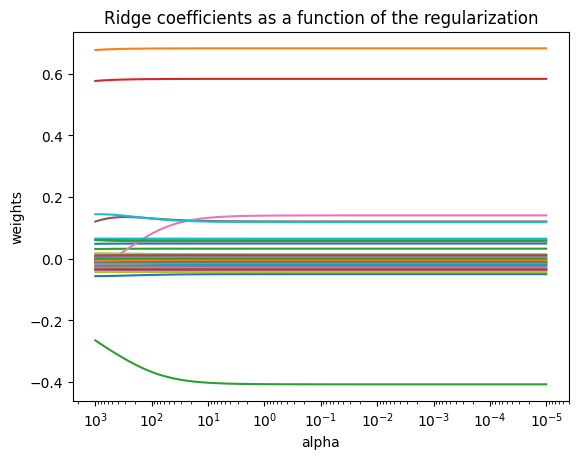

In [41]:
# Initialiser un tableau pour stocker les coefficients
coefs = []

# Pour chaque alpha, ajuster le modèle Ridge et stocker les coefficients
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train_scaled)
    coefs.append(ridge_model.coef_.flatten())  # Stocker les coefficients aplatis (1D)

# Convertir les coefficients en array pour pouvoir les tracer
coefs = np.array(coefs)

# Tracer les coefficients en fonction des alphas
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Inverser l'axe pour que les alphas décroissent
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [42]:
from sklearn.linear_model import Lasso
lass_model = Lasso(alpha=0)
lass_model = lass_model.fit(X_train_scaled,y_train_scaled)

c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.026e+04, tolerance: 1.892e+01 Line

In [43]:
# Aplatir le coefficient du modèle pour correspondre à l'index des colonnes de X_train
coef_scaled = pd.DataFrame(lass_model.coef_.flatten(), index=X_train.columns, columns=['Coef'])

# Ajouter l'intercept (biais) au DataFrame
coef_scaled.loc['Constante'] = lass_model.intercept_[0]  # Si intercept_ est un tableau

# Modifier l'affichage global des nombres en pandas pour utiliser un format décimal avec 6 chiffres après la virgule
pd.options.display.float_format = '{:.6f}'.format

# Affichage des coefficients avec les nouvelles options
coef_scaled

,Coef
Annee_reception_DPE,0.048943
Année_construction,-0.017248
Catégorie_ENR,0.032393
Classe_altitude,-0.025630
Classe_inertie_bâtiment,-0.007291
Deperditions_baies_vitrées,0.125333
Deperditions_enveloppe,0.123223
Deperditions_planchers_bas,-0.004777
Deperditions_planchers_hauts,0.014726
Déperditions_murs,0.122133


In [44]:
# Générer des valeurs d'alpha (logarithmique entre 1e-5 et 1e3)
alphas = np.logspace(-5, 3, 100)
print(alphas)

[1.00000000e-05 1.20450354e-05 1.45082878e-05 1.74752840e-05
 2.10490414e-05 2.53536449e-05 3.05385551e-05 3.67837977e-05
 4.43062146e-05 5.33669923e-05 6.42807312e-05 7.74263683e-05
 9.32603347e-05 1.12332403e-04 1.35304777e-04 1.62975083e-04
 1.96304065e-04 2.36448941e-04 2.84803587e-04 3.43046929e-04
 4.13201240e-04 4.97702356e-04 5.99484250e-04 7.22080902e-04
 8.69749003e-04 1.04761575e-03 1.26185688e-03 1.51991108e-03
 1.83073828e-03 2.20513074e-03 2.65608778e-03 3.19926714e-03
 3.85352859e-03 4.64158883e-03 5.59081018e-03 6.73415066e-03
 8.11130831e-03 9.77009957e-03 1.17681195e-02 1.41747416e-02
 1.70735265e-02 2.05651231e-02 2.47707636e-02 2.98364724e-02
 3.59381366e-02 4.32876128e-02 5.21400829e-02 6.28029144e-02
 7.56463328e-02 9.11162756e-02 1.09749877e-01 1.32194115e-01
 1.59228279e-01 1.91791026e-01 2.31012970e-01 2.78255940e-01
 3.35160265e-01 4.03701726e-01 4.86260158e-01 5.85702082e-01
 7.05480231e-01 8.49753436e-01 1.02353102e+00 1.23284674e+00
 1.48496826e+00 1.788649

c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.951e+04, tolerance: 1.892e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+04, tolerance: 1.892e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\linear_model\_coordinate_descent

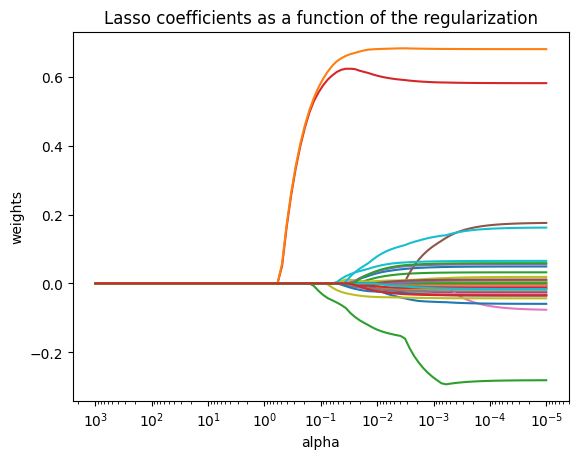

In [45]:
# Initialiser un tableau pour stocker les coefficients
coefs = []

# Pour chaque alpha, ajuster le modèle Lasso et stocker les coefficients
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=100)  # max_iter augmenté pour assurer la convergence
    lasso_model.fit(X_train_scaled, y_train_scaled)
    coefs.append(lasso_model.coef_.flatten())  # Stocker les coefficients aplatis (1D)

# Convertir les coefficients en array pour pouvoir les tracer
coefs = np.array(coefs)

# Tracer les coefficients en fonction des alphas
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Inverser l'axe pour que les alphas décroissent
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [46]:
# from sklearn.linear_model import ElasticNet

# # Générer des valeurs d'alpha (logarithmique entre 1e-5 et 1e3)
# alphas = np.logspace(-5, 3, 2)

# # Initialiser un tableau pour stocker les coefficients
# coefs = []

# # Paramètre l1_ratio : ici on peut choisir une valeur qui balance Lasso et Ridge (par exemple 0.5)
# l1_ratio = 0.5  # L1 et L2 sont équilibrés

# # Pour chaque alpha, ajuster le modèle ElasticNet et stocker les coefficients
# for alpha in alphas:
#     elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)  # max_iter pour convergence
#     elasticnet_model.fit(X_train_scaled, y_train_scaled)
#     coefs.append(elasticnet_model.coef_.flatten())  # Stocker les coefficients aplatis (1D)

# # Convertir les coefficients en array pour pouvoir les tracer
# coefs = np.array(coefs)

# # Tracer les coefficients en fonction des alphas
# ax = plt.gca()

# ax.plot(alphas, coefs)
# ax.set_xscale("log")
# ax.set_xlim(ax.get_xlim()[::-1])  # Inverser l'axe pour que les alphas décroissent
# plt.xlabel("alpha")
# plt.ylabel("weights")
# plt.title("ElasticNet coefficients as a function of the regularization")
# plt.axis("tight")
# plt.show()

c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE : 0.315864033365754
MAE : 0.17038447658454858


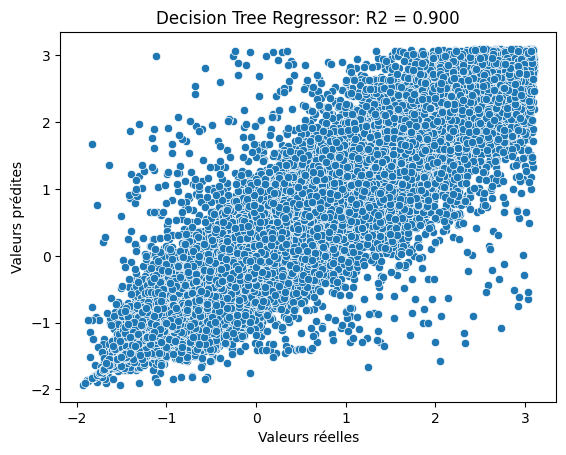

R2 : 0.8997359649514172
RMSE : 0.315864033365754
MAE : 0.17038447658454858


c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

tree_model = DecisionTreeRegressor(max_depth = 40,min_samples_split = 2, min_samples_leaf = 1)

tree_model.fit(X_train_scaled, y_train_scaled)

y_pred = tree_model.predict(X_test_scaled)
print("RMSE : " + str(mean_squared_error(y_test_scaled, y_pred, squared= False)))
print("MAE : " + str(mean_absolute_error(y_test_scaled, y_pred)))

# Aplatir y_test_scaled pour le rendre 1D
y_test_scaled = y_test_scaled.flatten()  # Transforme en vecteur 1D

# Affichage du scatterplot
sns.scatterplot(x=y_test_scaled, y=y_pred, legend=None)
plt.title(f'Decision Tree Regressor: R2 = {r2_score(y_test_scaled, y_pred):.3f}')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

# Affichage des autres métriques
print("R2 : " + str(r2_score(y_test_scaled, y_pred)))
print("RMSE : " + str(mean_squared_error(y_test_scaled, y_pred, squared=False)))
print("MAE : " + str(mean_absolute_error(y_test_scaled, y_pred)))

In [48]:
%pip install graphviz

In [49]:
# from sklearn.tree import export_graphviz
# import graphviz

# # Exporter l'arbre au format DOT
# dot_data = export_graphviz(tree_model, out_file=None, 
#                            feature_names=X_train.columns,  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# # Visualiser avec graphviz
# graph = graphviz.Source(dot_data)  
# graph.render("tree_model", format="png", view=True)  # Sauvegarder et ouvrir l'arbre

In [50]:
y_test

116584    779.400000
119020   1233.000000
57802    2340.300000
181955   2037.800000
50633     665.200000
             ...    
273719    415.000000
68441     920.800000
177657   1258.000000
11475     405.800000
224079    480.800000
Name: Coût_total_5_usages, Length: 81105, dtype: float64

c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ediad\Documents\Performance_Energetique\Performance_Energetique\performanceEnergetique\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE : 107.66837655059616
MAE : 61.238307774082074
R2 : 0.9478697423492155


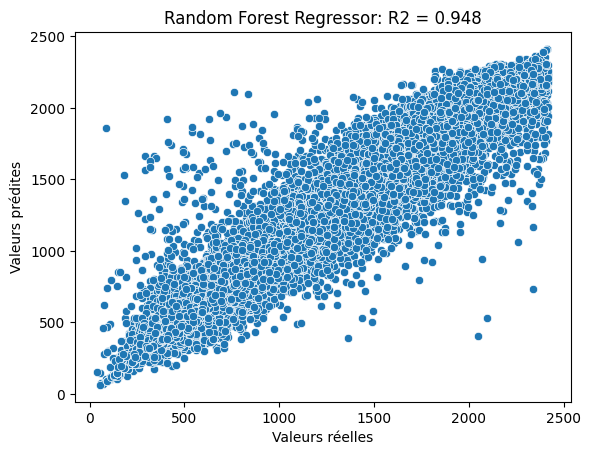

In [51]:
from sklearn.ensemble import RandomForestRegressor
from  sklearn.metrics  import  mean_squared_error
# Créer et entraîner un modèle de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, max_depth = 40,min_samples_split = 2, min_samples_leaf = 1, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test_scaled)


# Aplatir y_test_scaled pour le rendre 1D
y_test_scaled = y_test_scaled.flatten()  # Transforme en vecteur 1D

y_pred2 = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Calcul des métriques
print("RMSE : " + str(mean_squared_error(y_test, y_pred2, squared=False)))
print("MAE : " + str(mean_absolute_error(y_test, y_pred2)))
print("R2 : " + str(r2_score(y_test, y_pred2)))


# Affichage du scatterplot
sns.scatterplot(x=y_test, y=y_pred2, legend=None)
plt.title(f'Random Forest Regressor: R2 = {r2_score(y_test, y_pred2):.3f}')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()

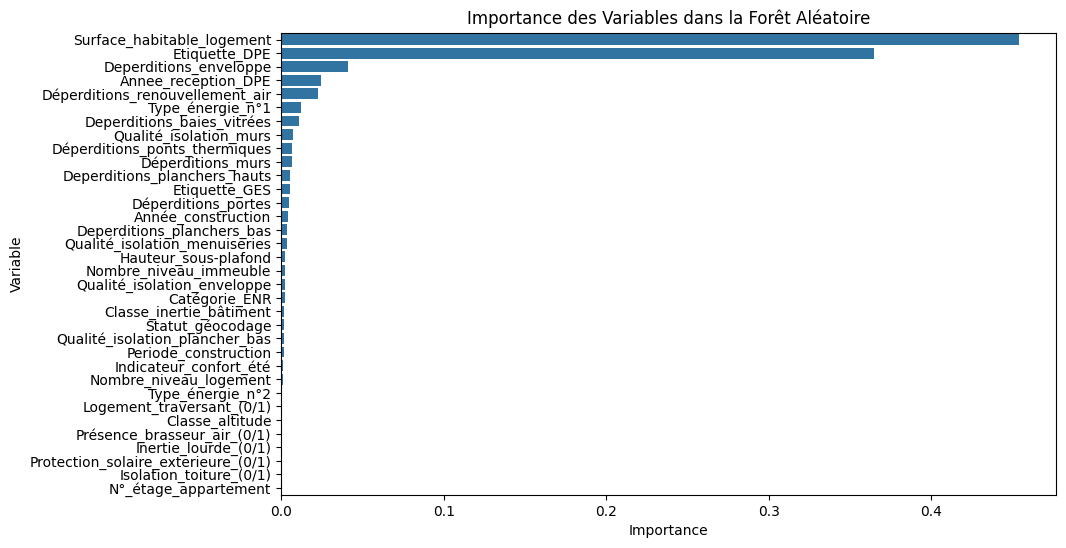

                                Feature  Importance
31           Surface_habitable_logement    0.454286
13                        Etiquette_DPE    0.365099
6                Deperditions_enveloppe    0.041096
0                   Annee_reception_DPE    0.024290
12      Déperditions_renouvellement_air    0.022922
32                     Type_énergie_n°1    0.011925
5            Deperditions_baies_vitrées    0.011039
28               Qualité_isolation_murs    0.007036
10        Déperditions_ponts_thermiques    0.006949
9                     Déperditions_murs    0.006712
8          Deperditions_planchers_hauts    0.005395
14                        Etiquette_GES    0.005144
11                  Déperditions_portes    0.004917
1                    Année_construction    0.004077
7            Deperditions_planchers_bas    0.003494
27        Qualité_isolation_menuiseries    0.003459
15                 Hauteur_sous-plafond    0.002623
20               Nombre_niveau_immeuble    0.002453
26          

In [52]:
# Extraire les importances des variables
importances = rf_model.feature_importances_

# Créer un DataFrame avec les importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Trier les variables par importance (en ordre décroissant)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importance des Variables dans la Forêt Aléatoire')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

# Afficher le DataFrame des importances
print(importance_df)

In [53]:
importance_df[]

SyntaxError: invalid syntax (4122928475.py, line 1)

In [89]:
y_pred

array([ 438.75, 1175.5 , 1938.6 , ..., 1625.15,  379.  ,  485.9 ])

In [106]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df.reset_index(drop=True)
columnsTrain   =  importance_df.loc[:10,'Feature']

columnsTrain 

0          Surface_habitable_logement
1                       Etiquette_DPE
2              Deperditions_enveloppe
3                 Annee_reception_DPE
4     Déperditions_renouvellement_air
5                    Type_énergie_n°1
6          Deperditions_baies_vitrées
7              Qualité_isolation_murs
8       Déperditions_ponts_thermiques
9                   Déperditions_murs
10       Deperditions_planchers_hauts
Name: Feature, dtype: object

In [107]:
list(columnsTrain)

['Surface_habitable_logement',
 'Etiquette_DPE',
 'Deperditions_enveloppe',
 'Annee_reception_DPE',
 'Déperditions_renouvellement_air',
 'Type_énergie_n°1',
 'Deperditions_baies_vitrées',
 'Qualité_isolation_murs',
 'Déperditions_ponts_thermiques',
 'Déperditions_murs',
 'Deperditions_planchers_hauts']